# Ground Effect

The total ground attenuation is calcuated as the sum of the attenuation in the source, receiver and middle region.
$$
A_{gr} = A_s + A_r + A_m
$$

The ground factor is determined by the type of ground in the specified region. A ground factor of $G = 0$ indicates hard ground, suggesting an amplifying effect on the sound power level. When $G = 1$, the ground is considered porous, indicating noise absorption. For values of $G$ between 0 and 1, the ground is deemed mixed. The precise ground factor for wind turbine noise simulations is somewhat controversial, as a higher ground factor results in lower noise emission levels in simulations. Consequently, wind parks can be built closer to residential areas. However, typical values used generally fall between $G = 0.7${cite:p}`blazing_star` and $G = 0.4${cite:p}`juurakko`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Calculation of ground attenuation
The source and receiver attenuation $A_s$ and $A_r$ are generally only dependent on the ground factor $G$ (except for f = 63 Hz where the attenuation is just equal to -1.5). However, for the 125, 250, 500, 1000 Hz octave bands, the attenuation is also dependant on the height $h$ of the source or receiver above ground. $d_p$ is the source-to-receiver distance, in metres, projected onto the ground planes. 

$$
a' = 1.5 + 3.0 \cdot e^{-0.12 \cdot \left(h - 5\right)^2} \cdot \left(1 - e^{-\frac{d_p}{50}}\right) + 5.7 \cdot e^{-0.09 \cdot h^2} \cdot \left(1 - e^{-2.8 \cdot 10^{-6} \cdot d_p^2}\right) \\
b' = 1.5 + 8.6 \cdot e^{-0.09 \cdot h^2} \cdot \left(1 - e^{-\frac{d_p}{50}}\right) \\
c' = 1.5 + 14.0 \cdot e^{-0.46 \cdot h^2} \cdot \left(1 - e^{-\frac{d_p}{50}}\right) \\
d' = 1.5 + 5.0 \cdot e^{-0.9 \cdot h^2} \cdot \left(1 - e^{-\frac{d_p}{50}}\right)
$$

The full calculatation for the attenuation in the source, receiver and middle region can be found in the table below.

| **Nominal midband frequency [Hz]** | **$A_s$ or $A_r$ [dB]** | **$A_m$ [dB]** |
|------------------------------------|-------------------------|----------------|
|                 63                 |          $-1.5$         |      $-3q$     |
|                 125                |  $-1.5 + G\cdot a'(h)$  |   $-3q(1-G)$   |
|                 250                |  $-1.5 + G\cdot b'(h)$  |   $-3q(1-G)$   |
|                 500                |  $-1.5 + G\cdot c'(h)$  |   $-3q(1-G)$   |
|                1000                |  $-1.5 + G\cdot d'(h)$  |   $-3q(1-G)$   |
|                2000                |       $-1.5(1-G)$       |   $-3q(1-G)$   |
|                4000                |       $-1.5(1-G)$       |   $-3q(1-G)$   |
|                8000                |       $-1.5(1-G)$       |   $-3q(1-G)$   |

*Tab 1: Formulas for computing ground attenuation contributions in the octave bands, denoted as $A_s$, $A_r$, and $A_m$ (Source: {cite:p}`iso_9613`).*

where
$$
q = \begin{cases}
1 - \frac{30(h_s + h_r)}{d_p} & \text{if } d_p > 30(h_s + h_r)\\
0 & \text{if } d_p \leq 30(h_s + h_r)
\end{cases}
$$

As it can be seen from the table above, when the ground factor $G=0$, indicating a hard and reflecting ground, the attenuation at both the source and receiver is -1.5 dB. This implies that the sound power level measured at the receiver is estimated to be 3 dB higher due to the ground effect.

### Octave band 125 Hz to 1000 Hz
As previously noted, the ground attenuation at the source and receiver for the octave bands 125 Hz, 250 Hz, 500 Hz, and 1000 Hz is determined using the prime functions defined earlier. These functions are dependent on the height of the source or receiver above the ground. The impact of height on the prime factor is illustrated below.

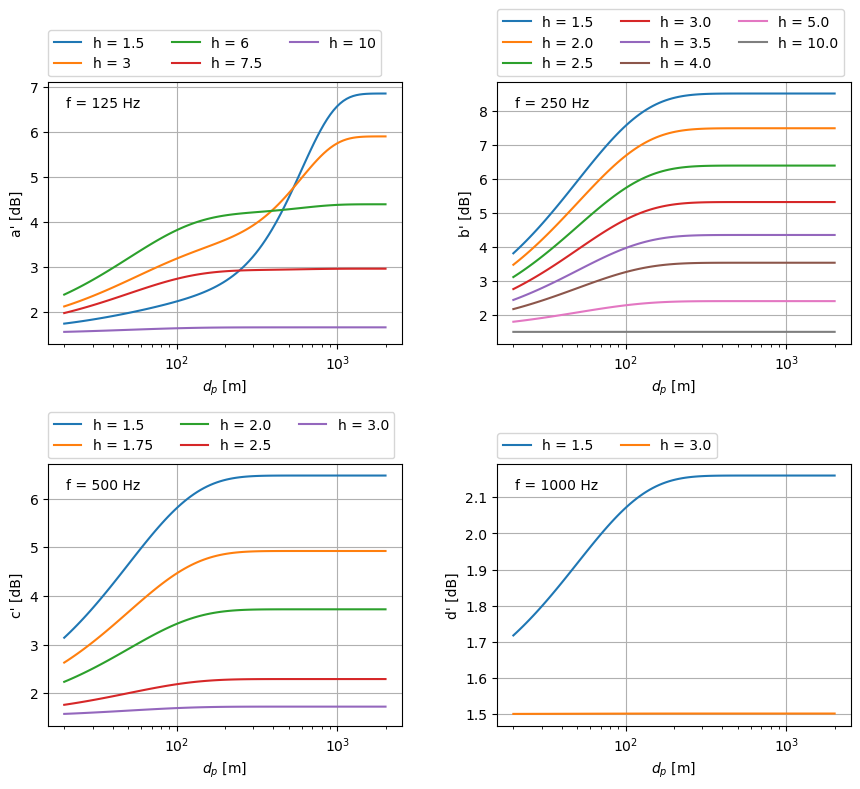

In [2]:
fs = [125, 250, 500, 1000]
dp = np.logspace(np.log10(20), np.log10(2000), 100)
hs = [[1.5, 3, 6, 7.5, 10], [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 10.0], [1.5, 1.75, 2.0, 2.5, 3.0], [1.5, 3.0]]

fig, axes = plt.subplots(2, 2, figsize=(9, 8))

for i, f in enumerate(fs):
    for h in hs[i]:
        prime_labels = ['a', 'b', 'c', 'd']
        prime_formulas = [
            1.5 + 3.0 * np.exp(-0.12*(h - 5)**2) * (1 - np.exp(-dp/50)) + 5.7 * np.exp(-0.09 * h**2) * (1 - np.exp(-2.8 * 10**(-6) * dp**2)),
            1.5 + 8.6 * np.exp(-0.09*h**2) * (1 - np.exp(-dp/50)),
            1.5 + 14.0 * np.exp(-0.46*h**2) * (1 - np.exp(-dp/50)),
            1.5 + 5.0 * np.exp(-0.9*h**2) * (1 - np.exp(-dp/50))
        ]

        ax = axes[i // 2, i % 2]
        ax.semilogx(dp, prime_formulas[i], label=f"h = {h}")
        ax.grid(True)
        ax.set(ylabel=f"{prime_labels[i]}' [dB]")
    ax.text(0.05, 0.9, f"f = {f} Hz", transform=ax.transAxes)

plt.setp(axes, xlabel=r'$d_p$ [m]')

for ax in axes.flatten():
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=3, borderaxespad=0.)

plt.tight_layout()
plt.show()

As observed earlier, the functions $a'$, $b'$, $c'$ and $d'$ all share a minimum limit of 1.5 dB. However, their overall values are dependent on the height of the source/receiver and the projected distance between them. Notably, the prime functions enable attenuations $A_s$ and $A_r$ to surpass those of other octave bands, particularly in more porous terrains characterized by a higher ground factor. In such cases, these octave bands possess the capacity to absorb a substantial amount of noise.